In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
click_data = pd.read_csv("../data/click_data.csv")
emotional_events = pd.read_csv("../data/emotional_events.csv")
messages_data = pd.read_csv("../data/messages_data.csv")
user_information = pd.read_csv("../data/user_information.csv")

### Having a look at the User_Information

In [121]:
print(user_information.isnull().sum())

id                           0
age                          0
gender                       0
education                    0
assistant_usage              0
experience_analysis_tools    0
Trust 1                      0
Trust 2                      0
Trust 3                      0
Satisfaction                 0
Anthropomorphism             0
dtype: int64


In [122]:
user_information.describe()

,id,age,experience_analysis_tools,Trust 1,Trust 2,Trust 3,Satisfaction,Anthropomorphism
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,179.397590,30.915663,4.144578,4.433735,3.891566,3.674699,4.397590,1.614458
std,33.767837,9.024634,1.601314,1.491380,1.710884,1.506963,1.505597,0.947800
min,124.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,150.500000,25.000000,3.000000,4.000000,3.000000,2.000000,3.500000,1.000000
50%,178.000000,28.000000,5.000000,4.000000,4.000000,4.000000,5.000000,1.000000
75%,208.500000,34.000000,5.000000,5.000000,5.000000,5.000000,5.500000,2.000000
max,238.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000


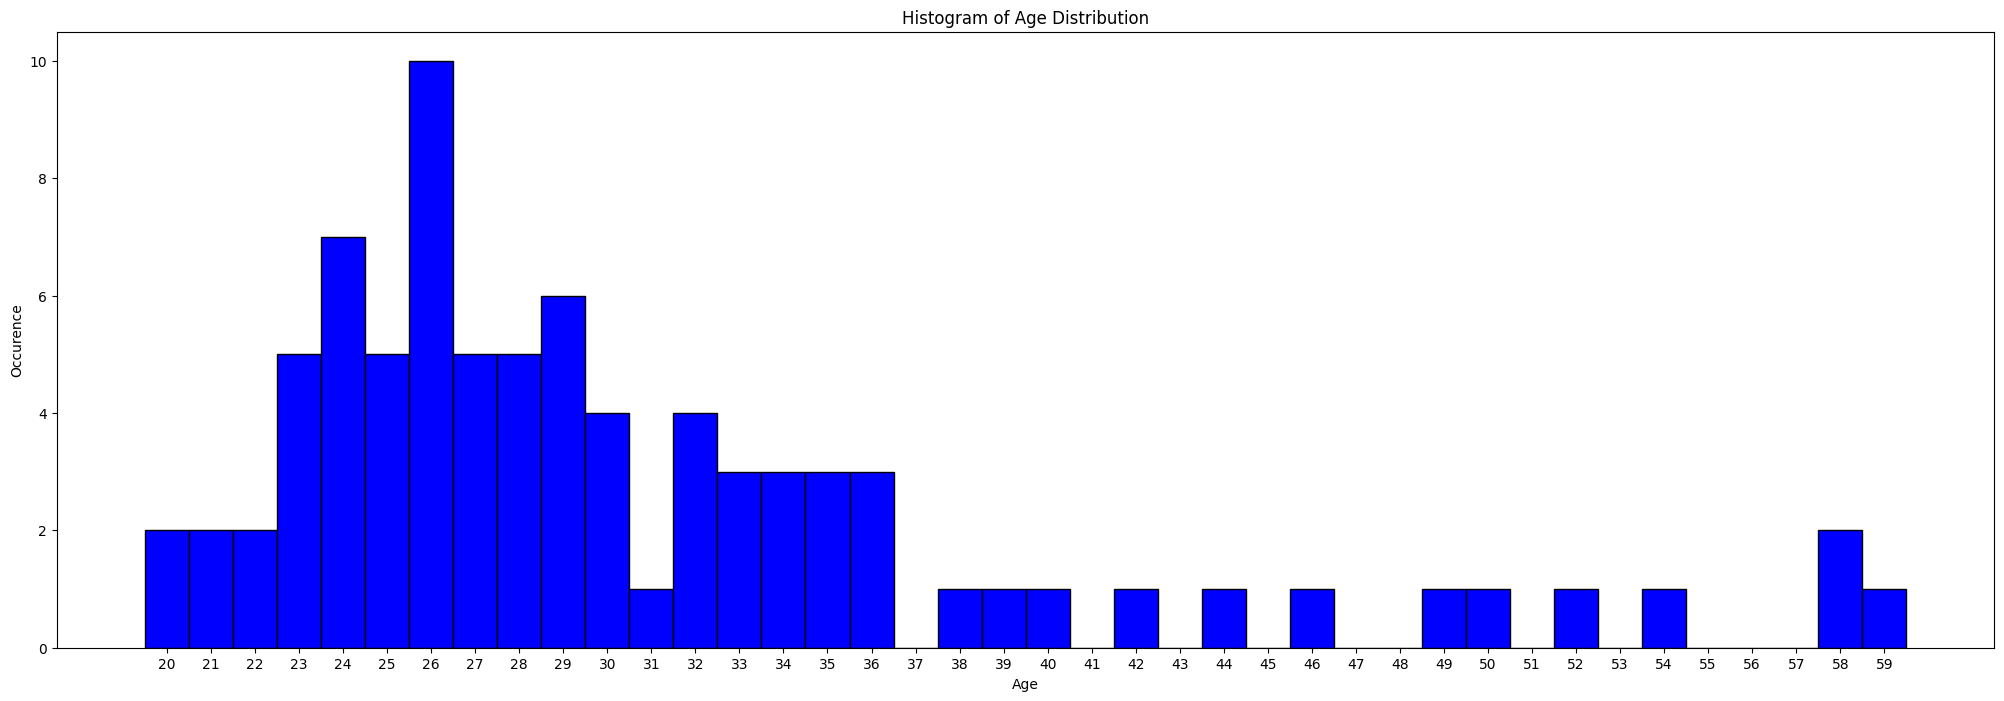

In [123]:
plt.figure(figsize=(25, 8))

counts, bins, patches = plt.hist(user_information['age'], color='blue', edgecolor='black', bins=40)

plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Occurence')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

plt.xticks(bin_centers, [f'{int(center)}' for center in bin_centers])

plt.show()

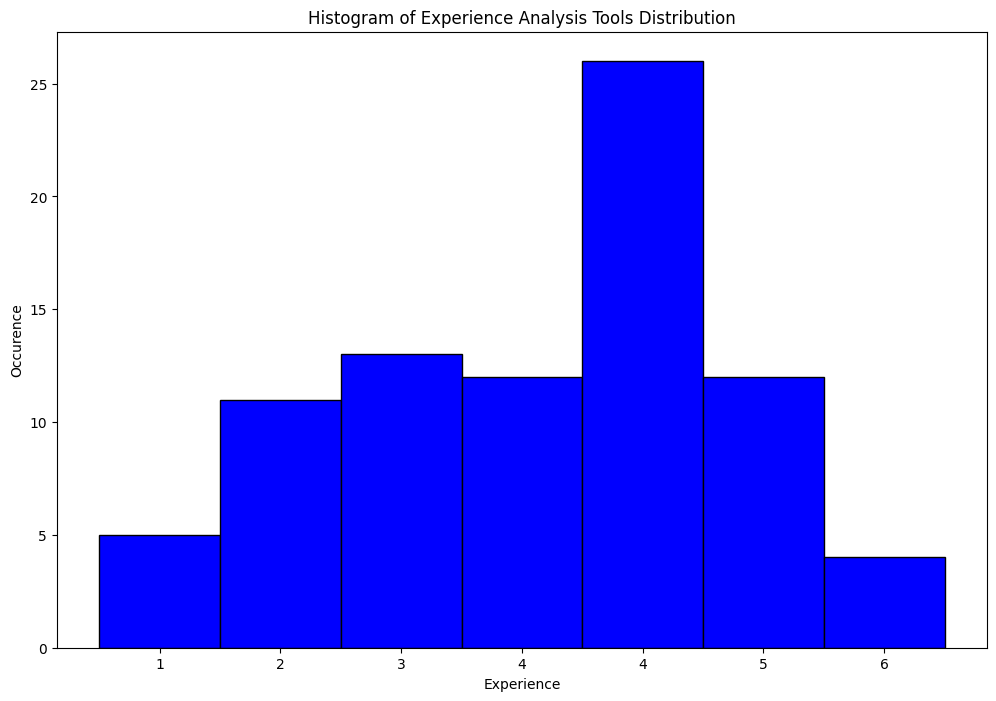

In [124]:
plt.figure(figsize=(12, 8))

counts, bins, patches = plt.hist(user_information['experience_analysis_tools'], color='blue', edgecolor='black', bins=7)

plt.title('Histogram of Experience Analysis Tools Distribution')
plt.xlabel('Experience')
plt.ylabel('Occurence')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

plt.xticks(bin_centers, [f'{int(center)}' for center in bin_centers])

plt.show()

### Having a look at message_data, able to extract how long an user takes at a task

In [125]:
messages_data.sort_values(by=["userId", "task", "timestamp_unix"], inplace=True)
messages_data.reset_index(drop=True, inplace=True)

messages_data["number_interactions_with_assistant"] = 0
messages_data["spent_time (seconds)"] = 0

for (userId, task), group in messages_data.groupby(['userId', 'task']):
    number_interactions = group.shape[0]
    
    first_interaction_time = group['timestamp_unix'].min()
    last_interaction_time = group['timestamp_unix'].max()
    
    total_time_spent = last_interaction_time - first_interaction_time
    
    messages_data.loc[group.index, 'number_interactions_with_assistant'] = number_interactions
    messages_data.loc[group.index, 'spent_time (seconds)'] = total_time_spent

    with open('../feature_Engineering/new_features.csv', 'a') as f:
        f.write(f"{userId},{task},{number_interactions},{total_time_spent}\n")


In [126]:
new_features = pd.read_csv("../feature_Engineering/new_features.csv")
new_features.head(20)

,userId,task,number_interactions_with_assistant,spent_time (seconds)
0,124,1,2,16
1,124,2,1,0
2,124,3,4,81
3,124,4,4,77
4,124,5,2,31
5,125,1,4,98
6,125,2,4,75
7,125,3,4,67
8,125,4,6,118
9,125,5,4,71


### Exploring click_data, able to extract interactions at a task

In [65]:
click_data.sort_values(by=["userId", "task"], inplace=True)
click_data.head(25)

,id,userId,task,timestamp,timestamp_unix,event_type,event_data
14,1fd1fdd2-6659-43b1-9c97-dd83b01bf520,125,5,2024-06-25 09:07:10.990514,1719306430,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
8,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:23.80224,1719307883,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
9,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:50.411794,1719307910,maximize_table,"{""type"": ""maximize_table"", ""surveyID"": ""Partic..."
10,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:32:43.703799,1719307963,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
15,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:40.075436,1719307900,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
16,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:32:27.832942,1719307947,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
17,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:32:44.541944,1719307964,maximize_table,"{""type"": ""maximize_table"", ""surveyID"": ""Partic..."
34,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:36.571941,1719307896,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
50,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:35.698926,1719307895,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
51,5b82e31b-4905-4ad0-a587-089bb5912fdd,129,3,2024-06-25 09:31:39.030028,1719307899,click_table,"{""type"": ""click_table"", ""surveyID"": ""Participa..."
